In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [3]:
tf.random.set_seed(42)
num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1

In [4]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3,
                    6.6, 7.4, 8.0, 9.0])


X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
ds_train = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train_norm, tf.float32),
     tf.cast(y_train, tf.float32)))

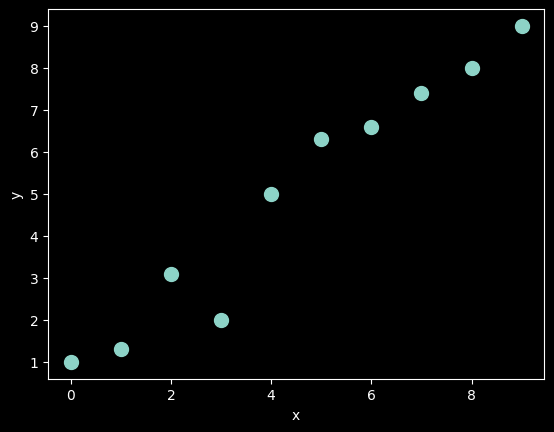

In [5]:
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
class CustomModel(tf.keras.Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        
        self.w = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')
        
    def call(self, x):
        return self.w * x + self.b

In [7]:
model = CustomModel()
model.build(input_shape=(None, 1))
model.summary()

Model: "custom_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dw, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

In [9]:
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))

ds = ds_train.shuffle(buffer_size=len(y_train))
ds = ds.repeat(count=None)
ds = ds.batch(1)
ws, bs = [], []

In [10]:
for i, batch in enumerate(ds):
    if i >= steps_per_epoch * num_epochs:
        break
    
    ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    
    bx, by = batch
    loss_val = loss_fn(model(bx), by)
    
    train(model, bx, by, learning_rate=learning_rate)
    if i % log_steps == 0:
        print(f'Epoch {int(i / steps_per_epoch):4d} Step {i:2d} Loss {loss_val:6.4f}')

Epoch    0 Step  0 Loss 39.6900
Epoch   10 Step 100 Loss 6.8942
Epoch   20 Step 200 Loss 20.1759
Epoch   30 Step 300 Loss 13.8028
Epoch   40 Step 400 Loss 11.8339
Epoch   50 Step 500 Loss 7.6534
Epoch   60 Step 600 Loss 4.9075
Epoch   70 Step 700 Loss 0.4647
Epoch   80 Step 800 Loss 2.3957
Epoch   90 Step 900 Loss 1.1942
Epoch  100 Step 1000 Loss 0.7035
Epoch  110 Step 1100 Loss 0.7777
Epoch  120 Step 1200 Loss 0.6282
Epoch  130 Step 1300 Loss 0.1060
Epoch  140 Step 1400 Loss 0.1195
Epoch  150 Step 1500 Loss 0.0598
Epoch  160 Step 1600 Loss 0.0904
Epoch  170 Step 1700 Loss 1.0800
Epoch  180 Step 1800 Loss 0.1064
Epoch  190 Step 1900 Loss 0.2961


In [12]:
print("Final parametrs:", model.w.numpy(), model.b.numpy())

Final parametrs: 2.6576438 4.8796453


- Validation.

In [20]:
X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_test)
y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))

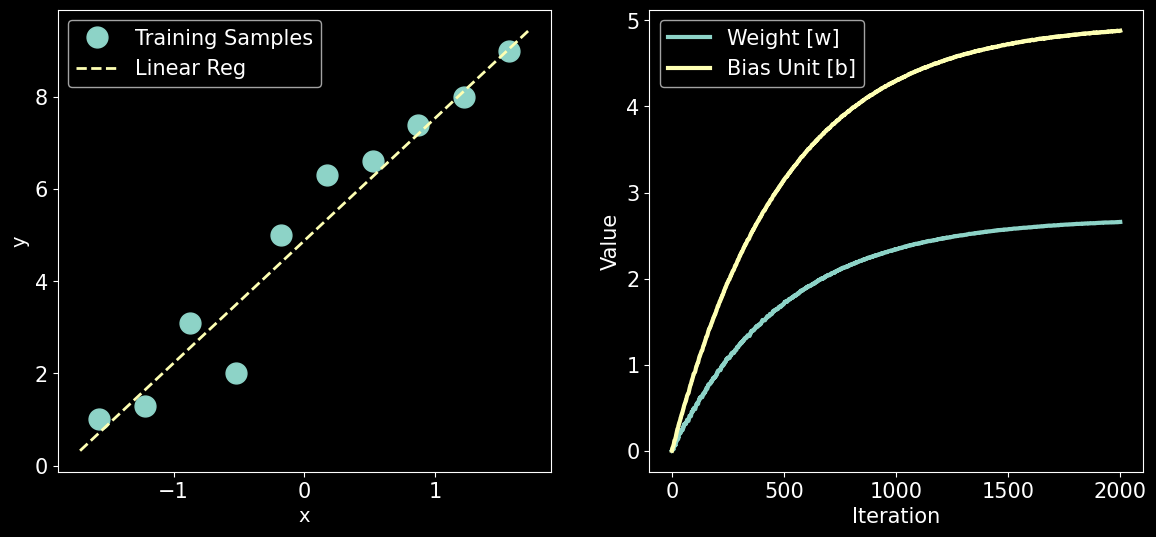

In [23]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=15)
plt.plot(X_test_norm, y_pred, '--', lw=2)
plt.legend(['Training Samples', 'Linear Reg'], fontsize=15)
ax.set_xlabel('x', size=14)
ax.set_ylabel('y', size=14)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['Weight [w]', 'Bias Unit [b]'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

- .Compile()

In [27]:
model2 = CustomModel()
model2.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['mse', 'mae'])

In [29]:
history = model2.fit(X_train_norm, y_train,
                     epochs=num_epochs, batch_size=batch_size, 
                     verbose=1)

Epoch 1/200


10/10 [==============================] - 0s 7ms/step - loss: 0.4137 - mse: 0.4137 - mae: 0.4926
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4138 - mse: 0.4138 - mae: 0.4925
Epoch 3/200
10/10 [==============================] - 0s 12ms/step - loss: 0.4138 - mse: 0.4138 - mae: 0.4826
Epoch 4/200
10/10 [==============================] - 0s 11ms/step - loss: 0.4136 - mse: 0.4136 - mae: 0.4838
Epoch 5/200
10/10 [==============================] - 0s 14ms/step - loss: 0.4133 - mse: 0.4133 - mae: 0.4904
Epoch 6/200
10/10 [==============================] - 0s 10ms/step - loss: 0.4132 - mse: 0.4132 - mae: 0.4836
Epoch 7/200
10/10 [==============================] - 0s 10ms/step - loss: 0.4133 - mse: 0.4133 - mae: 0.4939
Epoch 8/200
10/10 [==============================] - 0s 7ms/step - loss: 0.4136 - mse: 0.4136 - mae: 0.4839
Epoch 9/200
10/10 [==============================] - 0s 7ms/step - loss: 0.4139 - mse: 0.4139 - mae: 0.4923
Epoch 10/200
10/10 [===============

In [30]:
y_pred = model2.predict(X_test_norm)

4/4 [==============================] - 0s 5ms/step


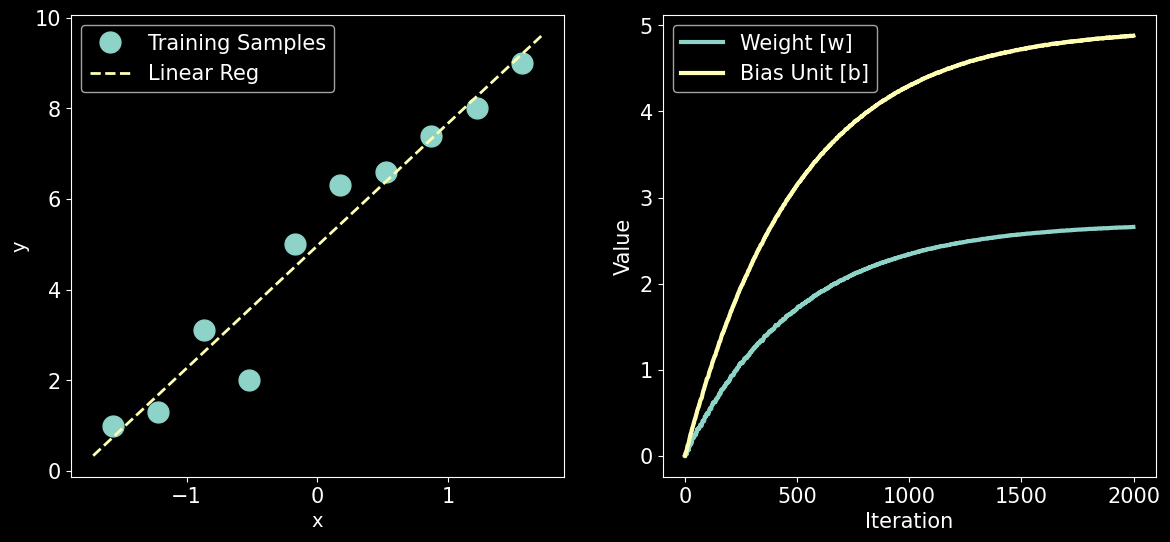

In [31]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=15)
plt.plot(X_test_norm, y_pred, '--', lw=2)
plt.legend(['Training Samples', 'Linear Reg'], fontsize=15)
ax.set_xlabel('x', size=14)
ax.set_ylabel('y', size=14)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['Weight [w]', 'Bias Unit [b]'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [38]:
import tensorflow_datasets as tfds

iris, info = tfds.load('iris', with_info=True)
print(info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

ConnectionError: HTTPSConnectionPool(host='archive.ics.uci.edu', port=443): Max retries exceeded with url: /static/public/53/iris.zip (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f01206e8370>: Failed to resolve 'archive.ics.uci.edu' ([Errno -3] Temporary failure in name resolution)"))